ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import joblib
from sklearn import metrics

import warnings
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 70em; }</style>"))

warnings.filterwarnings("ignore")

C:\Users\imran\AppData\Local\Temp\ipykernel_12772\754905543.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
sns.set(style= 'darkgrid', 
       color_codes=True,
       font = 'Arial',
       font_scale= 1.5,
       rc={'figure.figsize':(12,8)})

In [16]:
train_bio = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\bio_train_16k.csv')
train_phy = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\physics_train_16k.csv')
train_math = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\math_train_12k.csv')

real_case = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\real_dataset_10k.csv')

dfs = [train_bio, train_phy, train_math]

train_set = pd.concat(dfs)
train_set = train_set.dropna()



In [ ]:

"""

test_mathphy = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\test_pubs_50kmathphy.csv')
test_bio = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\test_pubs_46k_bio.csv')

dfs = [test_mathphy, test_bio]
test_set = pd.concat(dfs)
test_set = test_set.dropna()
"""

In [6]:
"""
train = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\training_pubs0.csv')
test = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\training_pubs1.csv')

bio_train = [train.formatted_category == 'physics']

train.drop(train[train.formatted_category == 'biology'].index, inplace=True)
train.drop(train[train.formatted_category == 'unknown'].index, inplace=True)
train.drop(train[train.formatted_category == 'economics'].index, inplace=True)
train.drop(train[train.formatted_category == 'formatted_category'].index, inplace=True)
train = train.dropna()

test = test.dropna()
test.drop(test[test.formatted_category == 'biology'].index, inplace=True)
test.drop(test[test.formatted_category == 'unknown'].index, inplace=True)
test.drop(test[test.formatted_category == 'economics'].index, inplace=True)



#bio = pd.read_csv(r'C:\Users\imran\PycharmProjects\Exploring_Science\datasets\bio_training_pubs.csv')


#training_data = pd.concat([train['formatted_category'], bio['category']])
bio_train
"""

[0         True
 1        False
 2         True
 3        False
 4        False
          ...  
 62174    False
 62175    False
 62176    False
 62177    False
 62178    False
 Name: formatted_category, Length: 62179, dtype: bool]

In [8]:
test_set.isna().sum()

title                 0
formatted_category    0
dtype: int64

In [88]:
words_per_title_train = train['title'].map(lambda x: len(x.split()))

Text(0.5, 0, 'Word Count')

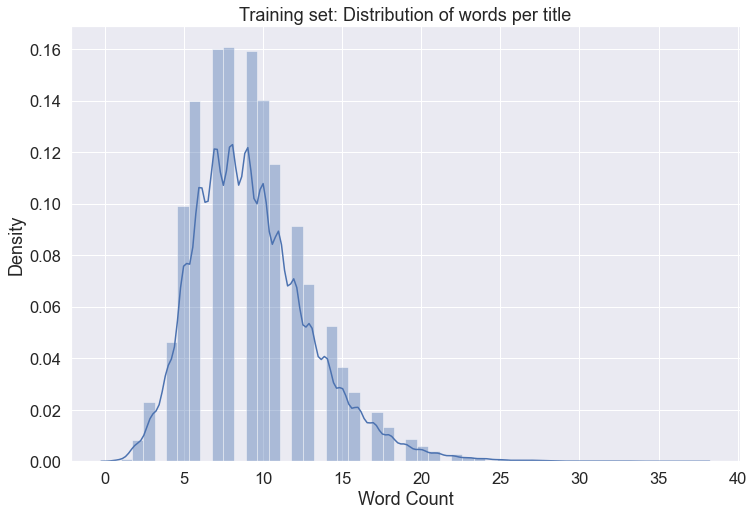

In [89]:
sns.distplot(words_per_title_train)
plt.title('Training set: Distribution of words per title')
plt.xlabel('Word Count')

Text(0.5, 1.0, 'Count Plot of Training Set Topics')

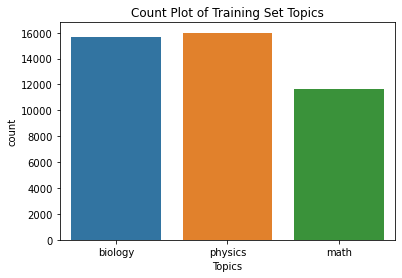

In [26]:
sns.countplot(train_set.formatted_category)
plt.xlabel('Topics')
plt.title('Count Plot of Training Set Topics')

# Model Development

## TFIDF Vectorization and Fitting

In [7]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(train_set.title)

TfidfVectorizer(stop_words='english')

## Training And Categorizing Features and Labels

In [8]:
features = tfidf.transform(train_set.title).toarray()
features.shape
label = train_set.formatted_category

In [9]:
nlp_categorizer = MultinomialNB()

#### 

In [10]:
nlp_categorizer.fit(features, label)

MultinomialNB()

In [11]:
filename = 'NLP_categorizer.sav'
joblib.dump(nlp_categorizer, open(filename, 'wb'))


In [10]:
test_actual = test_set.formatted_category
test_features = tfidf.transform(test_set.title).toarray()

In [17]:
real_features = tfidf.transform(real_case.pub_titles).toarray()

# Predictions

In [11]:

test_prediction = nlp_categorizer.predict(test_features)

In [18]:
real_prediction = nlp_categorizer.predict(real_features)

In [21]:
real_case['predicted category'] = real_prediction.tolist()
real_case.to_csv('predicted_categories_10k')

In [12]:
test_score = 100*(metrics.accuracy_score(test_actual , test_prediction ))
test_score

92.38145195132186

In [13]:
test_set['predicted category'] = test_prediction.tolist()
x = test_set.loc[test_set['formatted_category'] != test_set['predicted category']]
test_set

,title,formatted_category,predicted category
0,Vacuum Stability with Tachyonic Boundary Higgs...,physics,physics
1,Magnetic control of large room-temperature pol...,physics,physics
2,One-Loop Diagrams in Lattice QCD with Wilson F...,physics,physics
3,Asymmetry and Spin-Orbit Effects in Binding En...,physics,physics
4,On multiple scatterings of mesons in hot and c...,physics,physics
...,...,...,...
46576,Different trajectories of polyploidization sha...,biology,biology
46577,Genome sequencing of the bacteriophage CL31 an...,biology,biology
46578,Abrupt remapping in human CA3/dentate gyrus si...,biology,biology
46579,The C. elegans Notch proteins LIN-12 and GLP-1...,biology,biology
